In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
X = data.loc[:,"Time":"Amount"]
Y = data.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)
X_train_copy, Y_train_copy = X_train, Y_train

# Need to reset the indices OTHERWISE IT MESSES EVERYTHING UP
X_train = X_train.reset_index().loc[:,"Time":"Amount"]
X_test = X_test.reset_index().loc[:,"Time":"Amount"]

Y_train = Y_train.reset_index().loc[:,"Class"]
Y_test = Y_test.reset_index().loc[:,"Class"]

### Only 2 features aren't normalized: Time and Amount. We'll use a Standard Scaler to normalize them.

In [6]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,13558.0,1.148607,-0.004154,-0.231106,1.124256,0.696077,1.177523,-0.160142,0.201478,1.568269,...,-0.122816,-0.294334,-0.550620,-0.309693,-1.773489,0.791006,-0.263954,-0.008489,-0.011284,58.80
1,138022.0,-0.910538,-0.971254,1.033829,-1.514111,-1.068542,0.148626,-0.660712,0.694582,-0.563151,...,0.362532,0.183422,0.082033,0.245169,-0.347895,-0.046626,-0.366928,-0.130325,-0.161839,142.30
2,44997.0,1.222501,0.491904,-0.082522,0.987913,0.164676,-0.845453,0.515114,-0.258261,-0.667442,...,-0.076698,0.068123,0.244725,-0.173798,0.373883,0.849200,-0.317268,-0.007417,0.003691,7.99
3,78673.0,1.184303,-0.066290,0.400333,-0.048278,-0.447460,-0.521259,-0.103204,-0.044640,-0.032670,...,0.041195,-0.268415,-0.900138,0.112504,0.032476,0.046804,0.472132,-0.068010,0.008341,40.00
4,155618.0,-0.484059,0.439377,-2.033102,-3.398765,2.209264,3.175789,-0.566306,0.423994,-1.281704,...,-0.171988,1.344784,1.271853,0.055813,0.735276,-0.629507,-0.178298,0.394319,0.240147,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,154502.0,-0.312808,1.571520,0.625071,2.851596,1.440896,0.370273,1.559423,-0.122626,-2.127059,...,-0.013666,-0.072840,-0.276301,-0.144144,-0.813403,-0.094574,-0.086966,0.101273,0.154888,49.66
227841,127940.0,2.313488,-1.066660,-2.698797,-1.810692,0.181929,-0.825158,0.014053,-0.497443,-2.466535,...,-0.303714,0.175502,0.943729,-0.209989,0.371705,0.688140,0.270351,-0.078804,-0.087019,54.00
227842,143903.0,1.980328,0.104427,-0.923277,1.353652,0.047918,-0.223057,-0.382536,0.034461,0.965143,...,-0.217607,-0.283405,-0.677841,0.263567,-0.961968,-0.298113,-0.888231,0.073120,-0.005631,7.90
227843,136098.0,1.888991,-0.199603,-0.401767,1.366907,-0.105339,0.441041,-0.401390,0.227025,0.894311,...,-0.254580,-0.469722,-1.120237,0.470175,0.620089,-0.347252,-1.155696,0.049377,-0.033304,8.65


In [7]:
Y_train

0         0
1         0
2         0
3         0
4         0
         ..
227840    0
227841    0
227842    0
227843    0
227844    0
Name: Class, Length: 227845, dtype: int64

In [8]:
n_frauds = Y.value_counts()[1]
n_not_frauds = Y.value_counts()[0]
print(f"Number of fraudulent transactions: {n_frauds}")
print(f"Number of normal transactions: {n_not_frauds}")
print(f"Percentage of fraudulent transactions: {n_frauds/(n_frauds+n_not_frauds) * 100} %")

Number of fraudulent transactions: 492
Number of normal transactions: 284315
Percentage of fraudulent transactions: 0.1727485630620034 %


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer([("Scaler", StandardScaler(), ["Time", "Amount"])], remainder="passthrough")
col_trans.fit(X_train)
X_train_scaled = pd.DataFrame(col_trans.transform(X_train))
X_test_scaled = pd.DataFrame(col_trans.transform(X_test))

### Note: The column transformer puts the newly scaled features at the beginning of the dataframe, meaning that now the 2 first columns correspond to Time and Amount.

In [10]:
print(X_train_scaled.head())

         0         1         2         3         4         5         6   \
0 -1.707583 -0.119625  1.148607 -0.004154 -0.231106  1.124256  0.696077   
1  0.911438  0.214341 -0.910538 -0.971254  1.033829 -1.514111 -1.068542   
2 -1.046031 -0.322844  1.222501  0.491904 -0.082522  0.987913  0.164676   
3 -0.337407 -0.194817  1.184303 -0.066290  0.400333 -0.048278 -0.447460   
4  1.281701 -0.294807 -0.484059  0.439377 -2.033102 -3.398765  2.209264   

         7         8         9   ...        20        21        22        23  \
0  1.177523 -0.160142  0.201478  ...  0.360271 -0.122816 -0.294334 -0.550620   
1  0.148626 -0.660712  0.694582  ...  1.073261  0.362532  0.183422  0.082033   
2 -0.845453  0.515114 -0.258261  ...  0.029591 -0.076698  0.068123  0.244725   
3 -0.521259 -0.103204 -0.044640  ...  0.486907  0.041195 -0.268415 -0.900138   
4  3.175789 -0.566306  0.423994  ... -0.509811 -0.171988  1.344784  1.271853   

         24        25        26        27        28        29  
0 -0

### Let's check if a PCA can show if the data is easily separable

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(X_train_scaled)

In [12]:
principal_com_df = pd.DataFrame(data= principal_components, columns = ['PC1', 'PC2'])

In [13]:
principal_com_df_with_gt = pd.concat([principal_com_df, Y_train], axis=1)

In [14]:
principal_com_df_with_gt.head()

,PC1,PC2,Class
0,-0.974071,0.117383,0
1,0.982939,0.605622,0
2,-1.212547,-0.329847,0
3,-1.127935,0.135246,0
4,0.116354,-0.409678,0


In [15]:
import matplotlib.pyplot as plt

In [16]:
print(principal_com_df_with_gt.shape)

(227845, 3)


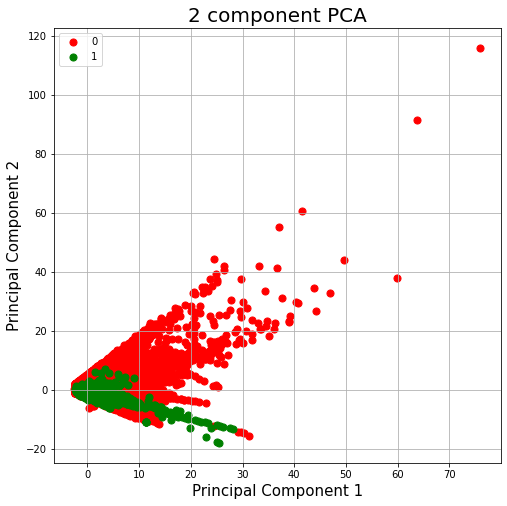

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principal_com_df_with_gt['Class'] == target
    ax.scatter(principal_com_df_with_gt.loc[indicesToKeep, 'PC1']
               , principal_com_df_with_gt.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Let's compute the correlation matrix to have more insights in the relationship between features and outputs

<AxesSubplot:>

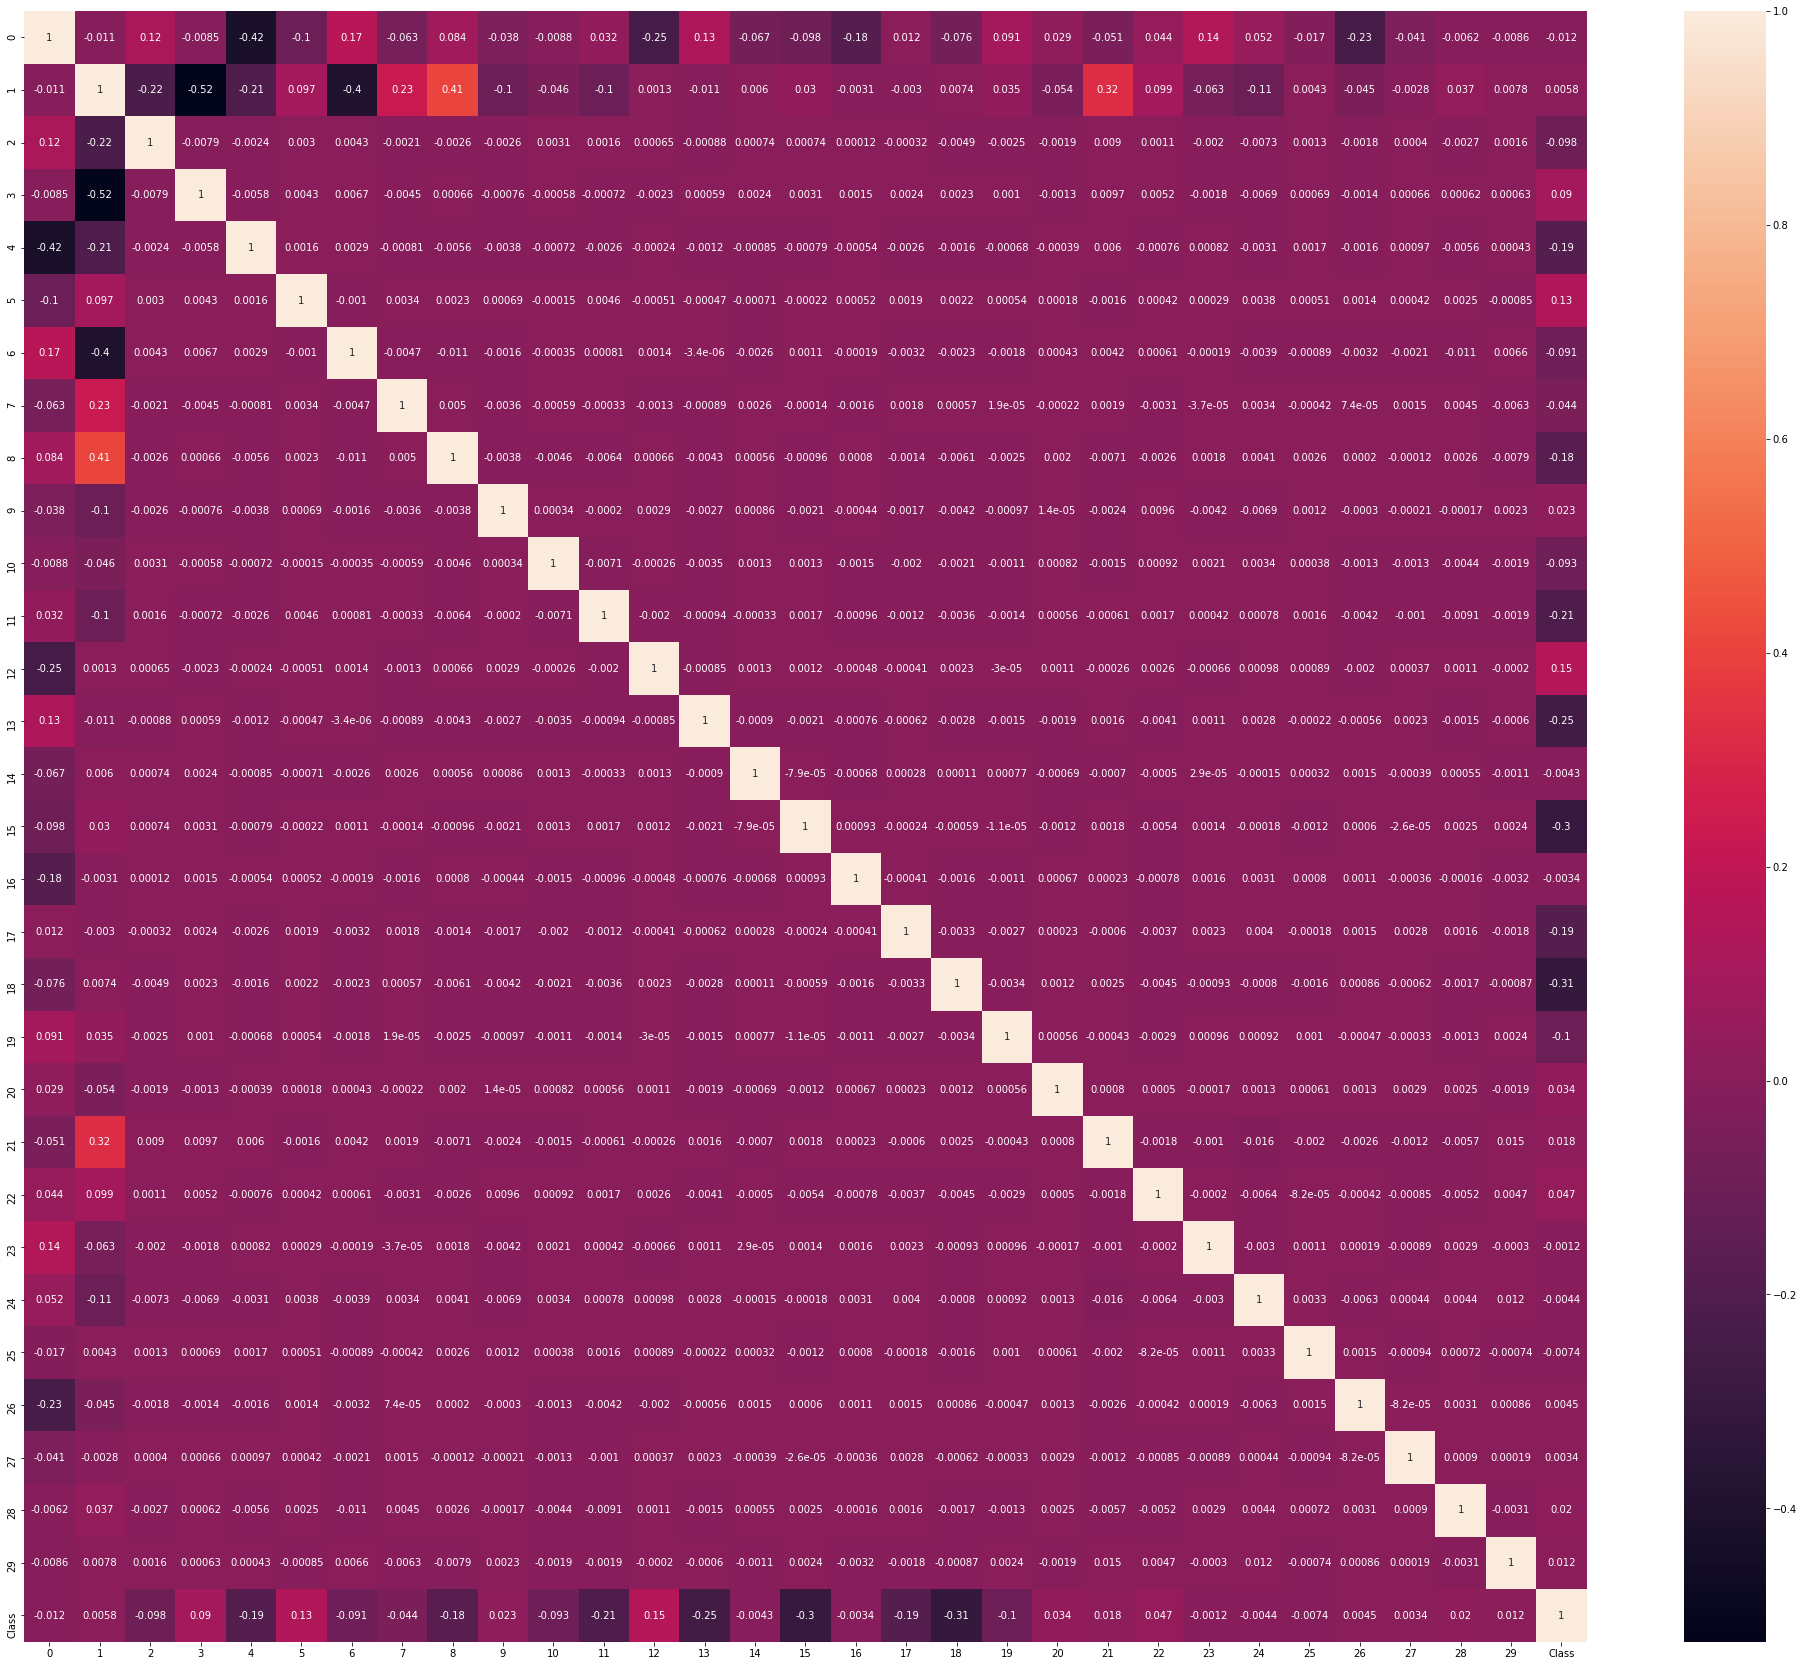

In [18]:
#Visualize correlation matrix
import seaborn as sn
fig, ax = plt.subplots(figsize=(35,30))         # Sample figsize in inches
correlation_matrix = pd.concat([X_train_scaled, Y_train], axis=1).corr()
sn.heatmap(correlation_matrix, annot=True)



# Let's explore how a simple Logistic Regression Model performs

In [19]:
n_frauds_train = Y_train.value_counts()[1]
n_not_frauds_train = Y_train.value_counts()[0]
n_frauds_test = Y_test.value_counts()[1]
n_not_frauds_test = Y_test.value_counts()[0]

print(f"Percentage of fraudulent transactions in training set: {n_frauds_train/(n_frauds_train+n_not_frauds_train) * 100} %")
print(f"Percentage of fraudulent transactions in test set: {n_frauds_test/(n_frauds_test+n_not_frauds_test) * 100} %")

Percentage of fraudulent transactions in training set: 0.17292457591783889 %
Percentage of fraudulent transactions in test set: 0.17204452090867595 %


In [20]:
print(n_frauds_train)
print(n_frauds_test)

394
98


#### We use cross validation on the training set to get a better estimate of the validation metrics' values.
#### We then keep the model with the highest cross validation metric, and train that model from scratch on the whole training set.
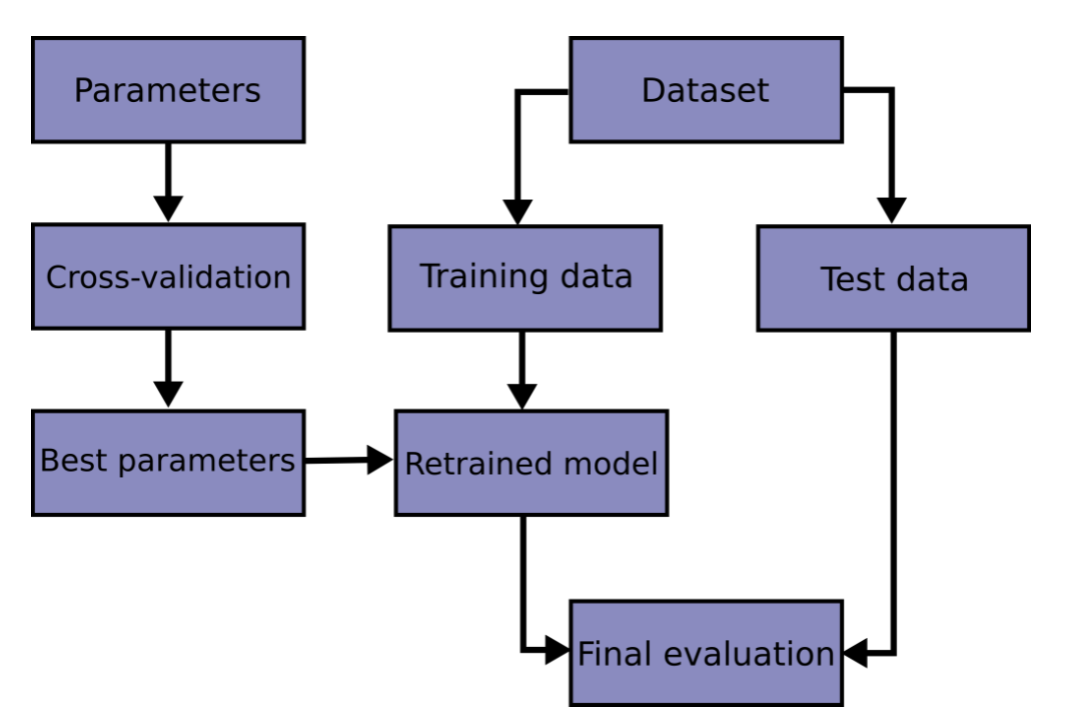

### Evaluate the model with relevant metrics: Accuracy is a terrible metric in fraud detection, as here predicting always a valid transaction would lead to an accuracy of  > 99.8%.
### This is why we can use F1 score, balanced accuracy and confusion matrix. F1 score isn't always a good metric as it heavily relies on precision. 
### Because the positive class is the "fraud" class, the precision can be small very quickly: If a few hundred valid samples are labelled as "fraud", this immediately brings the precision close to 0 which in turns brings the F1 score close to 0. This is why we decide to use average accuracy as the metric for doing model selection.
### Also, which metric to use would be defined by the requirements of the project (some might value more a better precision, others recall and so on).

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import balanced_accuracy_score, f1_score, average_precision_score, classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

n_splits = 5
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2)

In [22]:
params = {"C": [0.1, 1, 10], "class_weight" : [None, {1: 0.9, 0: 0.1}, {1: 0.99, 0: 0.01}], "max_iter": [500]}


gridsearch_logistic_r = GridSearchCV(LogisticRegression(), params, cv = sss,
                                      scoring="balanced_accuracy")
gridsearch_logistic_r.fit(X_train_scaled, Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.2,
            train_size=None),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10],
                         'class_weight': [None, {0: 0.1, 1: 0.9},
                                          {0: 0.01, 1: 0.99}],
                         'max_iter': [500]},
             scoring='balanced_accuracy')

In [23]:
print(gridsearch_logistic_r.best_score_)
print(gridsearch_logistic_r.best_params_)

0.935655492513308
{'C': 1, 'class_weight': {1: 0.99, 0: 0.01}, 'max_iter': 500}


#### Write our own custom metric to get more information about a model's predictions

In [16]:
def custom_metrics(Y_true, Y_pred):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for idx,val in enumerate(Y_true.values):
        if Y_pred[idx] == val and val == 1:
            tp += 1
        elif Y_pred[idx] == val and val == 0:
            tn += 1
        elif Y_pred[idx] != val and val == 1:
            fn += 1
        else:
            fp += 1
    
    precision = tp / (tp + fp + 1e-5)
    #recall is also true positive rate
    recall = tp / (tp + fn)
    true_negative_rate = tn / (tn + fp + 1e-5)
    f1 = 2 * precision * recall / (precision + recall + 1e-5)
    balanced_accuracy = (true_negative_rate + recall) / 2
    
    print(f"precision of model is: {precision:.5f}")
    print(f"recall (true positive rate) of model is: {recall:.5f}")
    print(f"true negative rate of model is: {true_negative_rate:.5f}")
    print(f"f1 score of model is: {f1:.5f}")
    print(f"balanced accuracy is: {balanced_accuracy:.5f}")
    return

#### Evaluate a bit more the results of the best logistic regressor

In [25]:
logistic_r = gridsearch_logistic_r.best_estimator_

print(f"Overall train accuracy is: {logistic_r.score(X_train_scaled, Y_train)*100:.2f}%")
print(f"Overall test accuracy is: {logistic_r.score(X_test_scaled, Y_test)*100:.2f}%")


Overall train accuracy is: 99.50%
Overall test accuracy is: 99.52%


In [26]:
y_preds = logistic_r.predict(X_train_scaled)
custom_metrics(Y_train, y_preds)

precision of model is: 0.24011
recall (true positive rate) of model is: 0.86294
true negative rate of model is: 0.99527
f1 score of model is: 0.37569
balanced accuracy is: 0.92911


### As we can see, the logistic regression model is very accurate on validating transactions, and can identify 86 out of 100 fraudulent transactions. This is quite good, but the F1 score is quite low (unlike the balanced accuracy), which highlights the downside of the F1 score.

Confusion matrix, without normalization
[[226375   1076]
 [    54    340]]
Normalized confusion matrix
[[1.   0.  ]
 [0.14 0.86]]


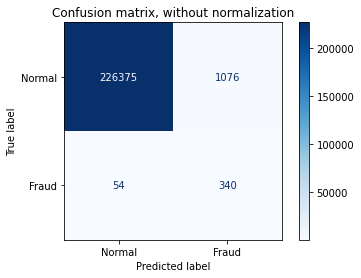

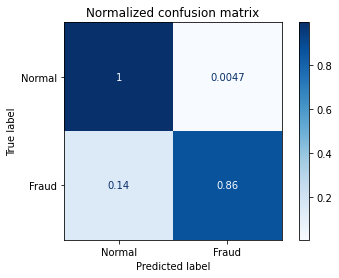

In [27]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_r, X_train_scaled, Y_train,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.75')

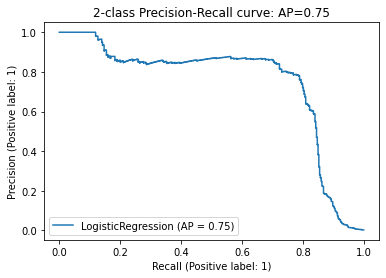

In [28]:
disp = plot_precision_recall_curve(logistic_r, X_train_scaled, Y_train)
average_precision = average_precision_score(Y_train, logistic_r.decision_function(X_train_scaled))
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [29]:
X_train_scaled.columns

RangeIndex(start=0, stop=30, step=1)

# Try same algorithm after we removed some of the least relevant features according to correlation matrix

In [30]:
irrelevant_features = [1, 14, 16, 23, 24, 25, 26, 27]

X_train_scaled = pd.DataFrame(X_train_scaled).drop(columns=irrelevant_features)
X_test_scaled = pd.DataFrame(X_test_scaled).drop(columns=irrelevant_features)

print(X_train_scaled.shape)

(227845, 22)


### Check cross validation accuracy

In [31]:
n_splits = 5
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2)

params = {"C": [0.1, 1, 10], "class_weight" : [None, {1: 0.9, 0: 0.1}, {1: 0.99, 0: 0.01}], "max_iter": [500]}


gridsearch_logistic_r = GridSearchCV(LogisticRegression(), params, cv = sss,
                                      scoring="balanced_accuracy")
gridsearch_logistic_r.fit(X_train_scaled, Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.2,
            train_size=None),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10],
                         'class_weight': [None, {0: 0.1, 1: 0.9},
                                          {0: 0.01, 1: 0.99}],
                         'max_iter': [500]},
             scoring='balanced_accuracy')

In [32]:
print(gridsearch_logistic_r.best_score_)
print(gridsearch_logistic_r.best_params_)

0.919399840276483
{'C': 0.1, 'class_weight': {1: 0.99, 0: 0.01}, 'max_iter': 500}


In [33]:
print(gridsearch_logistic_r.cv_results_)

{'mean_fit_time': array([1.83, 1.18, 1.14, 2.25, 1.75, 1.38, 1.84, 1.17, 1.34]), 'std_fit_time': array([0.49, 0.47, 0.39, 0.88, 0.64, 0.65, 0.39, 0.07, 0.34]), 'mean_score_time': array([0.09, 0.09, 0.08, 0.09, 0.08, 0.08, 0.08, 0.07, 0.08]), 'std_score_time': array([0.02, 0.02, 0.01, 0.02, 0.02, 0.02, 0.02, 0.  , 0.02]), 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_class_weight': masked_array(data=[None, {1: 0.9, 0: 0.1}, {1: 0.99, 0: 0.01}, None,
                   {1: 0.9, 0: 0.1}, {1: 0.99, 0: 0.01}, None,
                   {1: 0.9, 0: 0.1}, {1: 0.99, 0: 0.01}],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_max_iter': masked_array(data=[500, 500, 500, 500, 500, 500, 500, 500, 500],
           

#### Let's evaluate all metrics for this model on the training set

Confusion matrix, without normalization
[[226431   1020]
 [    57    337]]
Normalized confusion matrix
[[1.   0.  ]
 [0.14 0.86]]


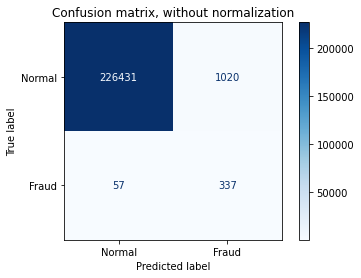

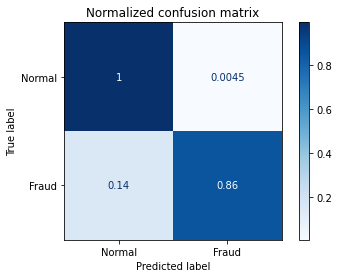

precision of model is: 0.24834
recall (true positive rate) of model is: 0.85533
true negative rate of model is: 0.99552
f1 score of model is: 0.38492
balanced accuracy is: 0.92542


In [34]:
logistic_r = gridsearch_logistic_r.best_estimator_
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_r, X_train_scaled, Y_train,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

y_preds = logistic_r.predict(X_train_scaled)
custom_metrics(Y_train, y_preds)

# Now let's try Support Vector Machines

In [35]:
#Reset the datasets
X_train_scaled = pd.DataFrame(col_trans.transform(X_train))
X_test_scaled = pd.DataFrame(col_trans.transform(X_test))

print(X_train.shape)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(227845, 30)
(227845, 30)
(56962, 30)


In [36]:
#Inspect the output of the stratified shuffle split
for train_index, test_index in sss.split(X_train_scaled.values, Y_train.values):
    X_train_cv, X_val_cv = X_train_scaled.values[train_index], X_train_scaled.values[test_index]
    Y_train_cv, Y_val_cv = Y_train.values[train_index], Y_train.values[test_index]
    print("X_train_cv shape: ", X_train_cv.shape)
    print("X_val_cv shape: ", X_val_cv.shape)
    print("Fraud examples Y_train_cv:",  np.count_nonzero(Y_train_cv == 1))
    print("Fraud examples Y_val_cv:",  np.count_nonzero(Y_val_cv == 1))

X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79
X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79
X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79
X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79
X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79


In [49]:
from sklearn.svm import SVC

In [38]:
params = {"C": [0.1, 1, 10],  "class_weight" : [None, {1: 0.9, 0: 0.1}, {1: 0.99, 0: 0.01}]}


gridsearch_svc = GridSearchCV(SVC(), params, cv = sss,
                                      scoring="balanced_accuracy")
gridsearch_svc.fit(X_train_scaled, Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.2,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'class_weight': [None, {0: 0.1, 1: 0.9},
                                          {0: 0.01, 1: 0.99}]},
             scoring='balanced_accuracy')

In [39]:
print(gridsearch_logistic_r.best_score_)
print(gridsearch_logistic_r.best_params_)

0.919399840276483
{'C': 0.1, 'class_weight': {1: 0.99, 0: 0.01}, 'max_iter': 500}


### Now we set up the code necessary to be able to reuse the model in other scripts, which means we need to incorporate the data scaling in the Pipeline before the model's prediction.

In [41]:
print(X_train_scaled.shape)
print(X_train_scaled[1000:1001])

(227845, 30)
            0        1         2         3         4         5         6   \
1000  1.131984 -0.26741  2.005588 -0.311307 -1.446461  0.288028 -0.151104   

            7         8        9   ...        20        21        22  \
1000 -1.082569  0.102029 -0.21594  ...  0.166942 -0.264003  0.385306   

            23        24        25        26       27        28       29  
1000  1.216568 -0.107284  0.161205  0.248271  0.98649 -0.110355 -0.08843  

[1 rows x 30 columns]


#### Train and save model just to practice on the model deployment part, this isn't necessarily the best model. Note however that the F1 score of the best SVC below is way better than the logistic regression model's, unlike the balanced accuracy.

In [42]:
#Now train model on full dataset and save it
svc = SVC(random_state=10)
svc.fit(X_train_scaled, Y_train)

SVC(random_state=10)

F1 score: 0.8779803646563815
precision of model is: 0.98119
recall (true positive rate) of model is: 0.79442
true negative rate of model is: 0.99997
f1 score of model is: 0.87798
balanced accuracy is: 0.89719


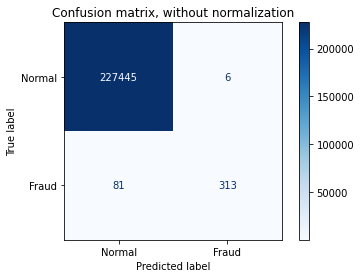

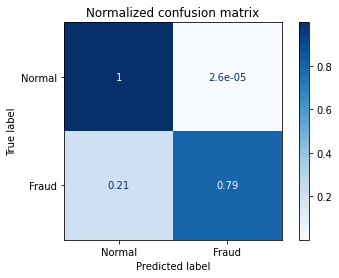

In [43]:
predicted_probs = svc.predict(X_train_scaled)
pred_f1_score = f1_score(Y_train, predicted_probs)
print(f"F1 score: {pred_f1_score}")

titles_options = [("Confusion matrix, without normalization", None),
              ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_train_scaled, Y_train,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
custom_metrics(Y_train, predicted_probs)

In [44]:
pipeline = Pipeline([("Scaler", col_trans), ("Classifier", svc)])

In [45]:
dump(pipeline, "svc.joblib")

['svc.joblib']

In [ ]:
#Make some test to check the data output format
test_input = X_train.loc[10:10]
print(test_input.to_dict(orient="records")[0])
class_pred = pipeline.predict(test_input)
print(class_pred)

# Now let's try a Gaussian Mixture Model: we will try the GMM with different number of clusters and probability thresholds

In [47]:
#We fit the GMM only on valid samples, in the hope that fraud samples will be associated a low probability by the GMM.
indices_fraud = Y_train.index[Y_train == True].tolist()
print(Y_train[indices_fraud[0:10]])
indices_valid = Y_train.index[Y_train == False].tolist()
print(Y_train[indices_valid[0:10]])


806     1
974     1
1109    1
1486    1
1546    1
2499    1
4249    1
4960    1
6022    1
6606    1
Name: Class, dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int64


In [48]:
from sklearn.mixture import GaussianMixture

In [49]:
n_clusters = [3,4,5,6,7,8]
#We also try different probability thresholds to flag an anomaly
thresholds = [0.1, 0.2, 0.3]

sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2)

for n_cluster in n_clusters:
    f1_thresholds_dict = {k:0 for k in thresholds}
    balanced_accuracy_thresholds_dict = {k:0 for k in thresholds}
    print("Number of clusters: ", n_cluster)
    sum_f1_scores = 0
    sum_balanced_accuracies = 0
    
    for train_index, test_index in sss.split(X_train_scaled.values, Y_train.values):
        X_train_cv, X_val_cv = X_train_scaled.iloc[train_index,:].reset_index(), X_train_scaled.iloc[test_index,:].reset_index()
        Y_train_cv, Y_val_cv = Y_train.iloc[train_index].reset_index(), Y_train.iloc[test_index].reset_index()
        indices_valid = list(Y_train_cv[Y_train_cv == False].index)
        X_train_scaled_valid = X_train_cv.iloc[indices_valid,:]
        gm = GaussianMixture(n_components=n_cluster, random_state=10)
        gm.fit(X_train_scaled_valid)
        
        predicted_probs_per_component = gm.predict_proba(X_val_cv)
        predicted_probs = np.sum(predicted_probs_per_component* gm.weights_, axis=1)
        for threshold in thresholds:
            decisions_gm = predicted_probs < threshold
            f1_thresholds_dict[threshold] += f1_score(Y_val_cv["Class"], decisions_gm)
            balanced_accuracy_thresholds_dict[threshold] += balanced_accuracy_score(Y_val_cv["Class"], decisions_gm)

    for threshold in thresholds:
        print("Threshold is: ", threshold)
        print(f"Average val F1: {f1_thresholds_dict[threshold]/n_splits}")
        print(f"Average val balanced accuracy: {balanced_accuracy_thresholds_dict[threshold]/n_splits}")

    

Number of clusters:  3
Threshold is:  0.1
Average val F1: 0.0
Average val balanced accuracy: 0.5
Threshold is:  0.2
Average val F1: 0.006678564222788665
Average val balanced accuracy: 0.5370566072387588
Threshold is:  0.3
Average val F1: 0.0066898554384845765
Average val balanced accuracy: 0.5377241068422326
Number of clusters:  4
Threshold is:  0.1
Average val F1: 0.056017323412581074
Average val balanced accuracy: 0.8766404913028598
Threshold is:  0.2
Average val F1: 0.02152096487885189
Average val balanced accuracy: 0.8443299542812301
Threshold is:  0.3
Average val F1: 0.015554693677586417
Average val balanced accuracy: 0.8042246870226034
Number of clusters:  5
Threshold is:  0.1
Average val F1: 0.03608810389001865
Average val balanced accuracy: 0.8577379643877776
Threshold is:  0.2
Average val F1: 0.01845494487558239
Average val balanced accuracy: 0.8136324578221392
Threshold is:  0.3
Average val F1: 0.008037710419405838
Average val balanced accuracy: 0.7040984664872791
Number of c

In [24]:
from sklearn.ensemble import IsolationForest

In [23]:
print(type(Y_train))
# For the isolation forest, the fraud class has to be -1 and the valid class has to be 1
Y_train_isolation_forest = np.where(Y_train==1,-1, 1)

<class 'pandas.core.series.Series'>


In [25]:
params = {"n_estimators":[50, 200, 1000], "contamination": ['auto', 0.0017]}

gridsearch_isolation_f = GridSearchCV(IsolationForest(), params, cv = sss,
                                      scoring="balanced_accuracy")
gridsearch_isolation_f.fit(X_train, Y_train_isolation_forest)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.2,
            train_size=None),
             estimator=IsolationForest(),
             param_grid={'contamination': ['auto', 0.0017],
                         'n_estimators': [50, 200, 1000]},
             scoring='balanced_accuracy')

In [26]:
print(gridsearch_isolation_f.best_score_)
print(gridsearch_isolation_f.best_params_)

0.8870659290816454
{'contamination': 'auto', 'n_estimators': 1000}


In [27]:
best_isolation_forest = gridsearch_isolation_f.best_estimator_
preds = best_isolation_forest.predict(X_train)
preds = np.where(preds==-1,1, 0)
    
custom_metrics(Y_train, preds)

precision of model is: 0.03834
recall (true positive rate) of model is: 0.81472
true negative rate of model is: 0.96460
f1 score of model is: 0.07323
balanced accuracy is: 0.88966


### Use the model with best cross validation balanced accuracy train it on the whole training set, then evaluate it on the test set

In [13]:
best_model = LogisticRegression(C=1., class_weight = {1: 0.99, 0: 0.01})

In [14]:
best_model.fit(X_train_scaled, Y_train)

LogisticRegression(class_weight={0: 0.01, 1: 0.99})

In [17]:
preds_train = best_model.predict(X_train_scaled)
custom_metrics(Y_train, preds_train)

precision of model is: 0.24011
recall (true positive rate) of model is: 0.86294
true negative rate of model is: 0.99527
f1 score of model is: 0.37569
balanced accuracy is: 0.92911


In [18]:
preds_test = best_model.predict(X_test_scaled)
custom_metrics(Y_test, preds_test)

precision of model is: 0.25356
recall (true positive rate) of model is: 0.90816
true negative rate of model is: 0.99539
f1 score of model is: 0.39643
balanced accuracy is: 0.95178


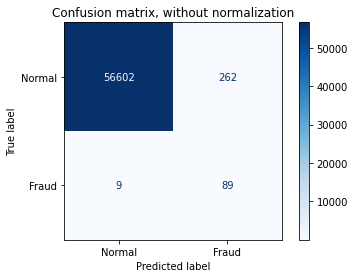

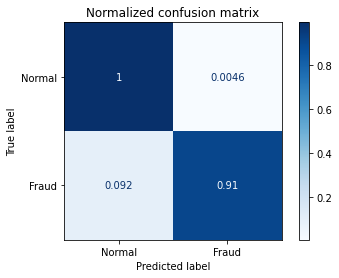

In [19]:
titles_options = [("Confusion matrix, without normalization", None),
              ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_model, X_test_scaled, Y_test,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.82')

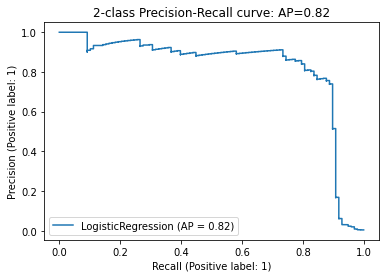

In [28]:
disp = plot_precision_recall_curve(best_model, X_test_scaled, Y_test)
average_precision = average_precision_score(Y_test, best_model.decision_function(X_test_scaled))
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [20]:
print(classification_report(Y_test, preds_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.91      0.40        98

    accuracy                           1.00     56962
   macro avg       0.63      0.95      0.70     56962
weighted avg       1.00      1.00      1.00     56962



In [68]:
#Save the best model
pipeline = Pipeline([("Scaler", col_trans), ("Classifier", best_model)])
dump(pipeline, "best_model.joblib")

['best_model.joblib']

### Just compare F1 score/Confusion matrix with the SVC trained with the best parameters

In [50]:
# Support Vector Machines
svc = SVC(C=0.1,  class_weight = {1: 0.99, 0: 0.01})
svc.fit(X_train_scaled, Y_train)

SVC(C=0.1, class_weight={0: 0.01, 1: 0.99})

precision of model is: 0.06289
recall (true positive rate) of model is: 0.91837
true negative rate of model is: 0.97642
f1 score of model is: 0.11772
balanced accuracy is: 0.94739


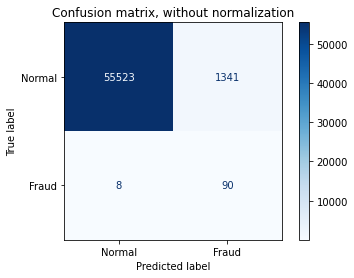

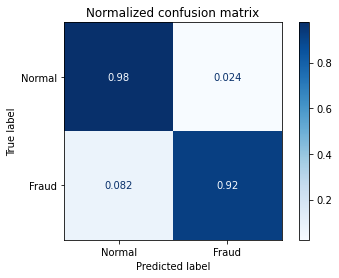

In [51]:
titles_options = [("Confusion matrix, without normalization", None),
              ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test_scaled, Y_test,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
preds_test = svc.predict(X_test_scaled)
custom_metrics(Y_test, preds_test)

